# Projeto Final


## Alunos

Victor Jurdi

Lucas Ohara

In [1]:
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Introdução

A ideia inicial do projeto consiste em, através de técnicas de regressão, realizar uma análise dos dados de atributos de jogadores do jogo FIFA 18 e tentar criar uma predição do valor dos jogadores em questão. Para isso, o software irá analisar uma série de características quantitativas que os players apresentam.

## Leitura e liempeza do Database

In [2]:
fifa = pd.read_csv("Fifa.csv")

fifa.head()

C:\Users\lucas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
fifa1 = fifa.drop(columns=['Unnamed: 0', 'Photo', 'Flag', 'Club Logo'])
fifa1

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,88,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,2143,79,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,De Gea,26,Spain,90,92,Manchester United,€64.5M,€215K,1458,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,2096,93,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,€340K,2165,60,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,G. Higuaín,29,Argentina,90,90,Juventus,€77M,€275K,1961,78,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [4]:
fifa1.describe()

,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,ID,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,17981.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,207658.710138,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,32291.667313,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,16.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,192622.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,214057.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,231448.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,241219.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


In [5]:
fifa2=fifa1.dropna()

In [6]:
valores=[]
for e in fifa2['Value']:
    if 'M' in e:
        
        M=float(e.replace('M','')[1:])*1000000
        valores.append(M)
    elif 'K' in e:
        
        K=float(e.replace('K',"")[1:])*1000
        valores.append(K)
        
    else:
        a = float(e[1:])
        valores.append(a)

fifa2['Value1']=valores
    
fifa2.replace(fifa2['Value'],fifa2['Value1'])
    
fifa2.drop(columns=['Value'])

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Name,Age,Nationality,Overall,Potential,Club,Wage,Special,Acceleration,Aggression,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Value1
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€565K,2228,89,63,...,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,95500000.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,€565K,2154,92,48,...,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,105000000.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€280K,2100,94,56,...,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,123000000.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€510K,2291,88,78,...,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,97000000.0
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€355K,2143,79,80,...,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0,92000000.0
7,E. Hazard,26,Belgium,90,91,Chelsea,€295K,2096,93,54,...,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0,90500000.0
8,T. Kroos,27,Germany,90,90,Real Madrid CF,€340K,2165,60,60,...,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0,79000000.0
9,G. Higuaín,29,Argentina,90,90,Juventus,€275K,1961,78,50,...,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0,77000000.0
10,Sergio Ramos,31,Spain,90,90,Real Madrid CF,€310K,2153,75,84,...,87.0,74.0,83.0,70.0,71.0,72.0,69.0,81.0,72.0,52000000.0
11,K. De Bruyne,26,Belgium,89,92,Manchester City,€285K,2162,76,68,...,57.0,84.0,70.0,85.0,85.0,81.0,85.0,71.0,81.0,83000000.0


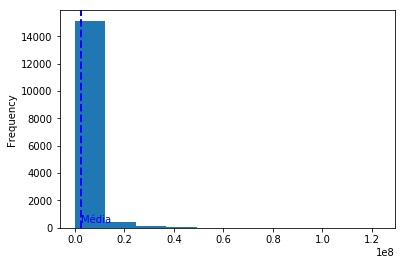

In [7]:
plot = fifa2.Value1.plot.hist()


def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color)    

  
verticalLine(plot, fifa2.Value1.mean(), 350, "b", "Média")

In [8]:
cor=fifa2.corr()

In [9]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]), #tamanho da fonte das variáveis
            
            dict(selector="td",
                 props=[('padding', "0em 0em")]), #tamanho dos retângulos  
            
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]), #tamanho da fonte das variáveis quando passsar o mouse sobre elas
            
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')]) #tamanho dos valores quando passar o mouse sobre eles
]

cor.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

## Habilidades

In [10]:
attributes = pd.read_excel('Attributes.xlsx')

In [11]:
attributes.head(10)

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11
5,79,80,78,80,89,87,62,77,85,91,...,91,83,88,19,83,79,42,84,78,87
6,57,38,60,43,42,64,17,21,18,13,...,88,50,31,13,58,40,21,64,68,13
7,93,54,93,91,92,87,80,82,93,83,...,85,86,79,22,87,79,27,65,86,79
8,60,60,71,69,89,85,85,85,79,76,...,86,90,87,69,52,77,82,74,88,82
9,78,50,75,69,85,86,68,74,84,91,...,88,75,88,18,80,72,22,85,70,88


In [12]:
corr=attributes.corr()


In [28]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]), #tamanho da fonte das variáveis
            
            dict(selector="td",
                 props=[('padding', "0em 0em")]), #tamanho dos retângulos  
            
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]), #tamanho da fonte das variáveis quando passsar o mouse sobre elas
            
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')]) #tamanho dos valores quando passar o mouse sobre eles
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

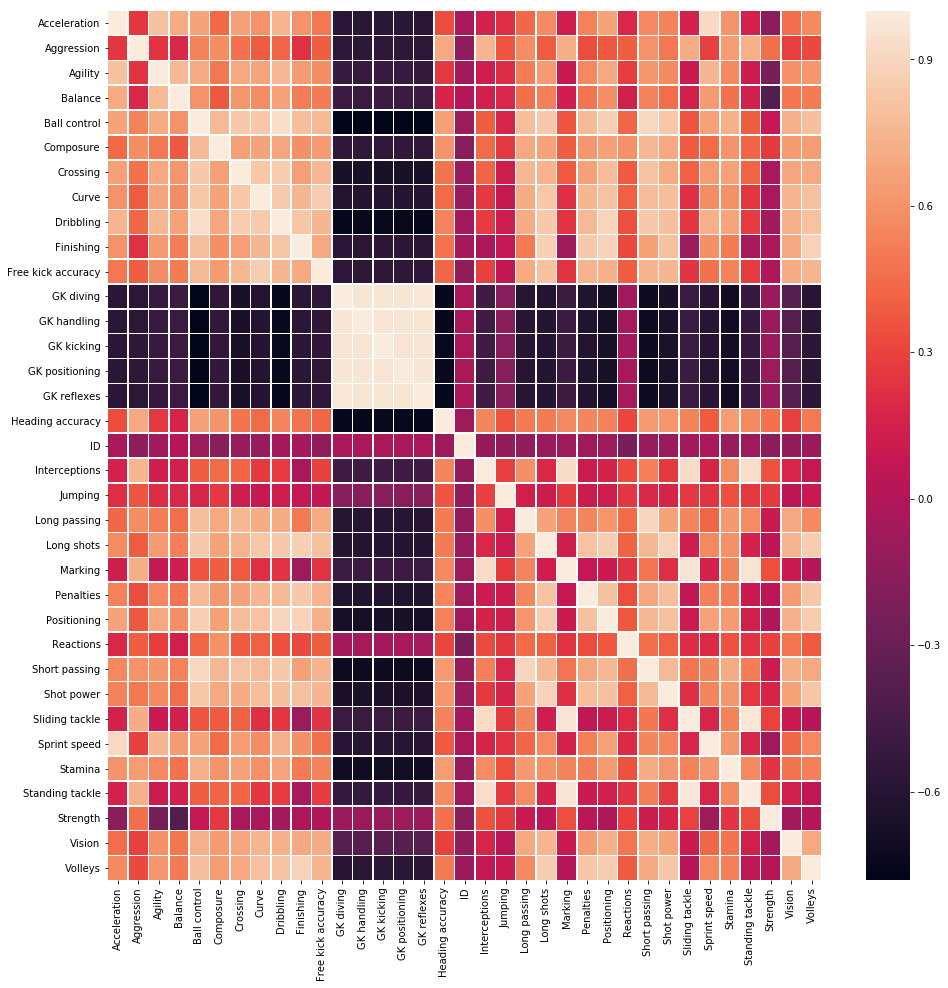

In [14]:
plt.figure(figsize= (16, 16))
sns.heatmap(corr, linewidth=0.5);

## Distribuição Valor

In [15]:
valor=fifa2['Value1']

In [16]:
fifa2.Value1.describe()

count    1.574600e+04
mean     2.521283e+06
std      5.493615e+06
min      0.000000e+00
25%      3.500000e+05
50%      7.500000e+05
75%      2.300000e+06
max      1.230000e+08
Name: Value1, dtype: float64

In [17]:
valor_min = fifa2.Value1.min()
valor_max = fifa2.Value1.max()

print('O jogador mais barato do jogo custa: €{:.2f}'.format(valor_min))
print('O jogador mais caro do jogo custa: €{:.2f}'.format(valor_max))

O jogador mais barato do jogo custa: €0.00
O jogador mais caro do jogo custa: €123000000.00


C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


ValueError: supplied range of [-inf, 18.627694913336693] is not finite

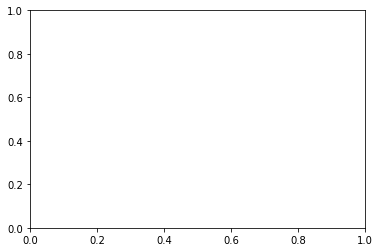

In [18]:
plt.hist(np.log(valor), density=True, bins= 40);

## Overall x Value

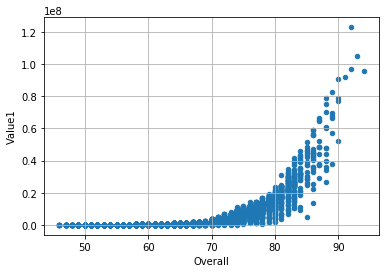

In [19]:
fifa2.plot.scatter(x="Overall",y="Value1");

plt.grid(True)

## Age x Value

In [20]:
np.corrcoef(fifa2.Age, fifa2.Value1)

array([[1.        , 0.08910016],
       [0.08910016, 1.        ]])

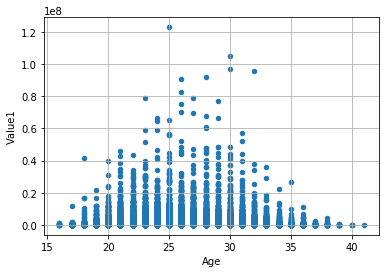

In [22]:
fifa2.plot.scatter(x="Age",y="Value1");

plt.grid(True)

## Potential x Value

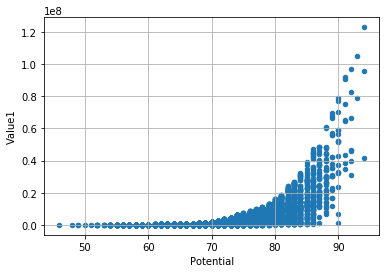

In [23]:
fifa2.plot.scatter(x="Potential",y="Value1");
plt.grid(True)

## Special x Value

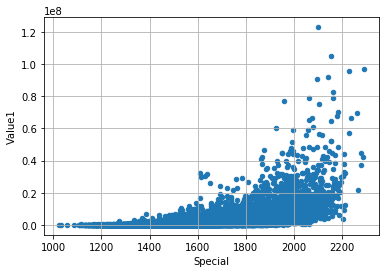

In [24]:
fifa2.plot.scatter(x="Special",y="Value1");
plt.grid(True)

In [25]:
np.corrcoef(attributes.Finishing, attributes.Dribbling)

array([[1.        , 0.82103626],
       [0.82103626, 1.        ]])

In [27]:
np.corrcoef(attributes.Strength, attributes.Aggression)

array([[1.        , 0.46395434],
       [0.46395434, 1.        ]])

In [31]:
indexa = fifa2[fifa2['Value1'] == 0 ].index
fifa2.drop(indexa , inplace=True)
fifa2.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Value1
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,...,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,105000000.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94,...,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,123000000.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,88,...,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,97000000.0
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,2143,79,...,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0,92000000.0
7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,2096,93,...,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0,90500000.0
